In [1]:
 %matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
filepath = "Assessors_Parcel_Data_2022.csv"
home_value_data = pd.read_csv(filepath)
home_value_data.head()

,ASMTYEAR,TAXYEAR,HOUSE_NO,STREET_NAME,UNIT_NO,ZIP_POSTAL,FORMATTED_ADDRESS,OWNERNM,TAXPAYER1,TAXPAYER2,...,TOTALVALUE,NUM_BLDGS,BUILDINGUSE,YEARBUILT,NUM_STORIES,PRIMARYHEATING,TOTAL_UNITS,FIREPLACES,BATHROOMS,BEDROOMS
0,2022,2023,2815,LAKE ST E,NaN,55406-1929,2815 LAKE ST E,TRUHER LLC,TRUHER LLC,977 PAYNE AVE,...,125800,0,NaN,NaN,NaN,NaN,0.0,0,0,0
1,2022,2023,3016,29TH AVE S,NaN,55406-1961,3016 29TH AVE S,SAMIR & KAWTHAR PROPERTIES,SAMIR PROPERTITES,461 W MARYLAND AVE #203,...,2718000,1,APARTMENT 6+ UNIT,1961.0,2.0,HOT WATER,26.0,0,0,0
2,2022,2023,3020,29TH AVE S,NaN,55406-1920,3020 29TH AVE S,ROBERT BIXBY,ROBERT BIXBY,3020 29TH AVE S,...,308000,1,SINGLE FAMILY HOUSE,1910.0,1.7,HOT WATER,1.0,0,1,3
3,2022,2023,3024,29TH AVE S,NaN,55406-1920,3024 29TH AVE S,ELROY L NEUHAUS ET AL,ELROY L NEUHAUS,DONELLA M NEUHAUS,...,216000,1,SINGLE FAMILY HOUSE,1910.0,1.7,HOT WATER,1.0,0,2,3
4,2022,2023,2727,LAKE ST E,NaN,55406-1927,2727 LAKE ST E,COUNTY OF HENNEPIN,COUNTY OF HENNEPIN,ATTN: REAL ESTATE MANAGER,...,0,1,LIBRARY,1976.0,1.0,HOT WATER,0.0,0,0,0


In [4]:
home_value_data.columns

Index(['ASMTYEAR', 'TAXYEAR', 'HOUSE_NO', 'STREET_NAME', 'UNIT_NO',
       'ZIP_POSTAL', 'FORMATTED_ADDRESS', 'OWNERNM', 'TAXPAYER1', 'TAXPAYER2',
       'TAXPAYER3', 'TAXPAYER4', 'NEIGHBORHOOD', 'COMMUNITY', 'WARD',
       'LANDUSE', 'PARCEL_AREA_SQFT', 'PRIMARY_PROP_TYPE', 'LANDVALUE',
       'BLDGVALUE', 'TOTALVALUE', 'NUM_BLDGS', 'BUILDINGUSE', 'YEARBUILT',
       'NUM_STORIES', 'PRIMARYHEATING', 'TOTAL_UNITS', 'FIREPLACES',
       'BATHROOMS', 'BEDROOMS'],
      dtype='object')

In [5]:
home_value_data['PRIMARY_PROP_TYPE'].unique()

array(['VACANT LAND - COMMERCIAL', 'APARTMENT', 'RESIDENTIAL',
       'COMMERCIAL', '2 UNIT RESIDENTIAL', 'VACANT LAND - RESIDENTIAL',
       'VACANT LAND - APARTMENT', 'INDUSTRIAL',
       'VACANT LAND - INDUSTRIAL', 'CONDO - GARAGE/MISC', 'CONDOMINIUM',
       '3 UNIT RESIDENTIAL', 'MED/CARE FACILITY', 'TOWNHOUSE',
       'COMMON AREA (NO VALUE)', 'RES - ZERO LOT LINE',
       'RESIDENTIAL MISC', 'COOPERATIVE', 'RESIDENTIAL LAKE SHORE',
       'SORORITY/FRATERNITY HOUSE', 'VACANT LAND - LAKESHORE'],
      dtype=object)

In [6]:

property_types = home_value_data[~home_value_data['PRIMARY_PROP_TYPE'].isin(['VACANT LAND - COMMERCIAL','COMMERCIAL','INDUSTRIAL',\
                                                         'VACANT LAND - INDUSTRIAL','MED/CARE FACILITY','COMMON AREA (NO VALUE)',\
                                                        'RES - ZERO LOT LINE'])]

new_property_types= property_types[property_types['TOTAL_UNITS'] > 0 ]
new_property_types= new_property_types[new_property_types['TOTALVALUE'] > 0 ]

#new_property_types= new_property_types.dropna()



In [7]:
property_types

,ASMTYEAR,TAXYEAR,HOUSE_NO,STREET_NAME,UNIT_NO,ZIP_POSTAL,FORMATTED_ADDRESS,OWNERNM,TAXPAYER1,TAXPAYER2,...,TOTALVALUE,NUM_BLDGS,BUILDINGUSE,YEARBUILT,NUM_STORIES,PRIMARYHEATING,TOTAL_UNITS,FIREPLACES,BATHROOMS,BEDROOMS
1,2022,2023,3016,29TH AVE S,NaN,55406-1961,3016 29TH AVE S,SAMIR & KAWTHAR PROPERTIES,SAMIR PROPERTITES,461 W MARYLAND AVE #203,...,2718000,1,APARTMENT 6+ UNIT,1961.0,2.0,HOT WATER,26.0,0,0,0
2,2022,2023,3020,29TH AVE S,NaN,55406-1920,3020 29TH AVE S,ROBERT BIXBY,ROBERT BIXBY,3020 29TH AVE S,...,308000,1,SINGLE FAMILY HOUSE,1910.0,1.7,HOT WATER,1.0,0,1,3
3,2022,2023,3024,29TH AVE S,NaN,55406-1920,3024 29TH AVE S,ELROY L NEUHAUS ET AL,ELROY L NEUHAUS,DONELLA M NEUHAUS,...,216000,1,SINGLE FAMILY HOUSE,1910.0,1.7,HOT WATER,1.0,0,2,3
6,2022,2023,2800,31ST ST E,NaN,55406-1902,2800 31ST ST E,TRINITY LIMITED PARTNERSHIP,TRINITY LIMITED PARTNERSHIP,614 N FIRST ST STE 100,...,15551000,1,APARTMENT 6+ UNIT,1978.0,8.0,HOT WATER,120.0,0,0,0
8,2022,2023,3026,30TH AVE S,NaN,55406-2034,3026 30TH AVE S,R G NEREM & C NEREM,CHERYL NEREM,3026 30TH AVE S,...,323000,1,DUPLEX,1920.0,1.2,FORCED AIR,2.0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130765,2022,2023,2910,31ST AVE S,NaN,55406-1616,2910 31ST AVE S,ARNOLD D BLAIR,ARNOLD D BLAIR,2910 31ST AVE S,...,171000,1,SINGLE FAMILY HOUSE,1900.0,2.0,GRAVITY,1.0,0,1,1
130766,2022,2023,2912,31ST AVE S,NaN,55406-1616,2912 31ST AVE S,ELIZABETH D GRAYDEN,ELIZABETH GRAYDEN,2912 31ST AVE S,...,287000,1,SINGLE FAMILY HOUSE,1900.0,2.0,FORCED AIR,1.0,0,2,3
130767,2022,2023,2916,31ST AVE S,NaN,55406-1616,2916 31ST AVE S,C HOSANSKY & S HOSANSKY,CAREN HOSANSKY,STUART HOSANSKY,...,309000,1,SINGLE FAMILY HOUSE,1907.0,1.5,HOT WATER,1.0,0,2,3
130768,2022,2023,2920,31ST AVE S,NaN,55406-1616,2920 31ST AVE S,JOSEPH BICKLE,JOSEPH BICKLE,2920 31ST AVE S,...,254000,1,SINGLE FAMILY HOUSE,1909.0,1.7,HOT WATER,1.0,0,1,2


In [8]:
float_TV = new_property_types["TOTALVALUE"].astype('float64')
float_TU = new_property_types["TOTAL_UNITS"].astype('float64')

property_value_perunit= float_TV / float_TU

new_property_types["Per Unit Value"]= property_value_perunit



In [9]:
 new_property_types

,ASMTYEAR,TAXYEAR,HOUSE_NO,STREET_NAME,UNIT_NO,ZIP_POSTAL,FORMATTED_ADDRESS,OWNERNM,TAXPAYER1,TAXPAYER2,...,NUM_BLDGS,BUILDINGUSE,YEARBUILT,NUM_STORIES,PRIMARYHEATING,TOTAL_UNITS,FIREPLACES,BATHROOMS,BEDROOMS,Per Unit Value
1,2022,2023,3016,29TH AVE S,NaN,55406-1961,3016 29TH AVE S,SAMIR & KAWTHAR PROPERTIES,SAMIR PROPERTITES,461 W MARYLAND AVE #203,...,1,APARTMENT 6+ UNIT,1961.0,2.0,HOT WATER,26.0,0,0,0,104538.461538
2,2022,2023,3020,29TH AVE S,NaN,55406-1920,3020 29TH AVE S,ROBERT BIXBY,ROBERT BIXBY,3020 29TH AVE S,...,1,SINGLE FAMILY HOUSE,1910.0,1.7,HOT WATER,1.0,0,1,3,308000.000000
3,2022,2023,3024,29TH AVE S,NaN,55406-1920,3024 29TH AVE S,ELROY L NEUHAUS ET AL,ELROY L NEUHAUS,DONELLA M NEUHAUS,...,1,SINGLE FAMILY HOUSE,1910.0,1.7,HOT WATER,1.0,0,2,3,216000.000000
6,2022,2023,2800,31ST ST E,NaN,55406-1902,2800 31ST ST E,TRINITY LIMITED PARTNERSHIP,TRINITY LIMITED PARTNERSHIP,614 N FIRST ST STE 100,...,1,APARTMENT 6+ UNIT,1978.0,8.0,HOT WATER,120.0,0,0,0,129591.666667
8,2022,2023,3026,30TH AVE S,NaN,55406-2034,3026 30TH AVE S,R G NEREM & C NEREM,CHERYL NEREM,3026 30TH AVE S,...,1,DUPLEX,1920.0,1.2,FORCED AIR,2.0,0,2,3,161500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130765,2022,2023,2910,31ST AVE S,NaN,55406-1616,2910 31ST AVE S,ARNOLD D BLAIR,ARNOLD D BLAIR,2910 31ST AVE S,...,1,SINGLE FAMILY HOUSE,1900.0,2.0,GRAVITY,1.0,0,1,1,171000.000000
130766,2022,2023,2912,31ST AVE S,NaN,55406-1616,2912 31ST AVE S,ELIZABETH D GRAYDEN,ELIZABETH GRAYDEN,2912 31ST AVE S,...,1,SINGLE FAMILY HOUSE,1900.0,2.0,FORCED AIR,1.0,0,2,3,287000.000000
130767,2022,2023,2916,31ST AVE S,NaN,55406-1616,2916 31ST AVE S,C HOSANSKY & S HOSANSKY,CAREN HOSANSKY,STUART HOSANSKY,...,1,SINGLE FAMILY HOUSE,1907.0,1.5,HOT WATER,1.0,0,2,3,309000.000000
130768,2022,2023,2920,31ST AVE S,NaN,55406-1616,2920 31ST AVE S,JOSEPH BICKLE,JOSEPH BICKLE,2920 31ST AVE S,...,1,SINGLE FAMILY HOUSE,1909.0,1.7,HOT WATER,1.0,0,1,2,254000.000000


In [10]:
property_value = new_property_types.groupby('NEIGHBORHOOD').mean()['Per Unit Value']
property_value.sort_values()

property_value_df = pd.DataFrame({'Per Unit Value' : property_value})
property_value_df_sort = property_value_df.sort_values('Per Unit Value', ascending=False)

In [11]:
top_5 = property_value_df_sort.head(5)
top_5

,Per Unit Value
NEIGHBORHOOD,
KENWOOD,1.028401e+06
LOWRY HILL,6.899875e+05
LYNNHURST,6.658008e+05
DOWNTOWN EAST,6.246975e+05
CEDAR-ISLES-DEAN,6.198984e+05


In [12]:
bottom_5 = property_value_df_sort.tail(5)
bottom_5

,Per Unit Value
NEIGHBORHOOD,
HAWTHORNE,175037.530683
FOLWELL,173732.419279
VENTURA VILLAGE,166533.584129
MCKINLEY,165155.447071
PHILLIPS WEST,159740.327309


In [39]:
#Relable smaller categories of residential neighborhoods into total residential 
new_property_types_RES_clean = new_property_types.replace(
           to_replace=["2 UNIT RESIDENTIAL", "3 UNIT RESIDENTIAL","SORORITY/FRATERNITY HOUSE","RESIDENTIAL LAKE SHORE"],
           value="RESIDENTIAL")
properties_in_city = new_property_types_RES_clean.groupby('PRIMARY_PROP_TYPE').count()['HOUSE_NO'].reset_index()
properties_in_city['% of Total Properties'] = properties_in_city['HOUSE_NO'] / properties_in_city['HOUSE_NO'].sum()
# clean_properties_in_city = properties_in_city[properties_in_city['HOUSE_NO'] > 1000]
# clean_properties_in_city

properties_in_city


,PRIMARY_PROP_TYPE,HOUSE_NO,% of Total Properties
0,APARTMENT,3266,0.030272
1,CONDOMINIUM,16305,0.151130
2,COOPERATIVE,1525,0.014135
3,RESIDENTIAL,85778,0.795073
4,TOWNHOUSE,1013,0.009389


<IPython.core.display.Javascript object>


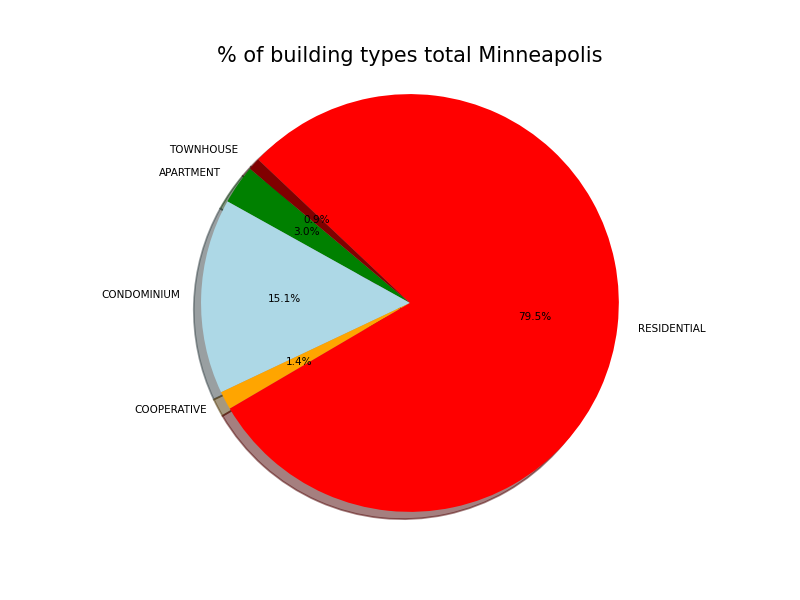

([<matplotlib.patches.Wedge at 0x1bae12de880>,
 [Text(-0.9059842408960328, 0.6238529916959918, 'APARTMENT'),
  Text(-1.0993962123677654, 0.036441298432015955, 'CONDOMINIUM'),
  Text(-0.9725970703425847, -0.5138627625748159, 'COOPERATIVE'),
  Text(1.0929436450621195, -0.12439529218715742, 'RESIDENTIAL'),
  Text(-0.8214283666630265, 0.7316115352024682, 'TOWNHOUSE')],
 [Text(-0.49417322230692695, 0.3402834500159955, '3.0%'),
  Text(-0.5996706612915084, 0.0198770718720087, '15.1%'),
  Text(-0.530507492914137, -0.28028877958626314, '1.4%'),
  Text(0.5961510791247924, -0.0678519775566313, '79.5%'),
  Text(-0.4480518363616508, 0.3990608373831645, '0.9%')])

In [41]:

explode = (0,0,0,0,0)
colors = ["green","lightblue","orange","red","maroon"]


all_minneapolis = plt.pie(properties_in_city['HOUSE_NO'], explode=explode, labels=properties_in_city['PRIMARY_PROP_TYPE'], colors=colors,
        autopct="%1.1f%%" , shadow=True, startangle=140, textprops={'fontsize': 6})


plt.title('% of building types total Minneapolis')

plt.axis("equal")

all_minneapolis



<IPython.core.display.Javascript object>


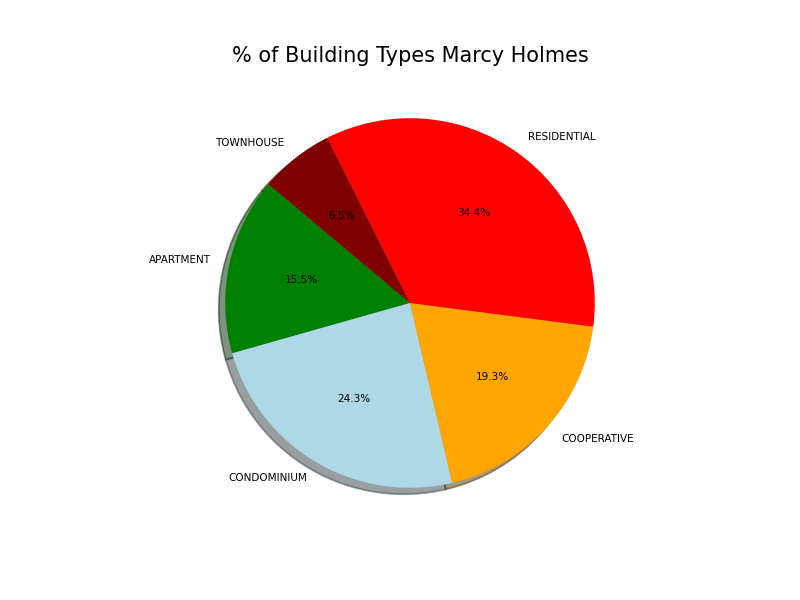

Text(0.5, 1.0, '% of Building Types Marcy Holmes')

In [42]:
new_property_types_RES_Marcy = new_property_types_RES_clean[new_property_types_RES_clean['NEIGHBORHOOD'] == 'MARCY-HOLMES' ]
properties_in_marcy = new_property_types_RES_Marcy.groupby('PRIMARY_PROP_TYPE').count()['HOUSE_NO'].reset_index()

marcy_holmes = plt.pie(properties_in_marcy['HOUSE_NO'], labels=properties_in_marcy['PRIMARY_PROP_TYPE'], colors=colors,
        autopct="%1.1f%%" , shadow=True, startangle=140, textprops={'fontsize': 6})

plt.title('% of Building Types Marcy Holmes')




In [16]:
avg_value_per_building_minneapolis = new_property_types_RES_clean.groupby('PRIMARY_PROP_TYPE').mean()['Per Unit Value'].reset_index()
avg_value_per_building_Marcy = new_property_types_RES_Marcy.groupby('PRIMARY_PROP_TYPE').mean()['Per Unit Value'].reset_index()

In [17]:
combined_data = pd.merge(avg_value_per_building_minneapolis,avg_value_per_building_Marcy, on = "PRIMARY_PROP_TYPE")
combined_data.rename(columns = {'Per Unit Value_x':'Avg Unit Value Total Minneapolis', 'Per Unit Value_y': 'Avg Unit Value Marcy Holmes'})

,PRIMARY_PROP_TYPE,Avg Unit Value Total Minneapolis,Avg Unit Value Marcy Holmes
0,APARTMENT,137812.372366,158698.362963
1,CONDOMINIUM,319634.885005,512323.529412
2,COOPERATIVE,164632.140534,157353.703704
3,RESIDENTIAL,346785.908780,293647.994467
4,TOWNHOUSE,380631.391905,266895.604396


<IPython.core.display.Javascript object>


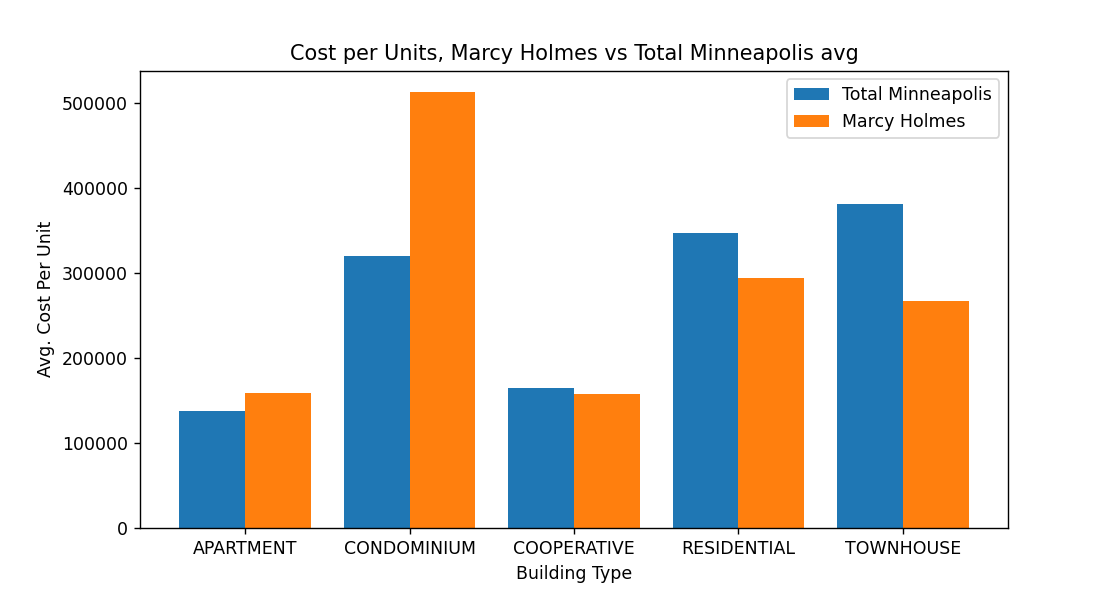

In [44]:
X = combined_data['PRIMARY_PROP_TYPE']
Y = combined_data['Per Unit Value_x']
Z = combined_data['Per Unit Value_y']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Total Minneapolis')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Marcy Holmes')
  
plt.xticks(X_axis, X)
plt.xlabel("Building Type")
plt.ylabel("Avg. Cost Per Unit")
plt.title("Cost per Units, Marcy Holmes vs Total Minneapolis avg")
plt.legend()

